In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [3]:
print('Importation des librairies...')
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from yahoofinancials import YahooFinancials
print('Librairies importées')

Importation des librairies...


Using TensorFlow backend.


Librairies importées


In [30]:
start = '2014-01-28'
end = '2019-05-22'

currencies = ['EURJPY=X', 'GBPJPY=X', 'USDJPY=X','GBPUSD=X','BTCUSD=X','ETHUSD=X','GBPEUR=X',\
             'GBPSGD=X','GBPSEK=X','GBPSAR=X','CADUSD=X','CADJPY=X','AUDUSD=X','NZDUSD=X',\
             'NZDGBP=X','NZDEUR=X','AUDGBP=X','AUDEUR=X',]
daily_currency_prices = YahooFinancials(currencies).get_historical_price_data(start,end,'daily')
temp_df = pd.DataFrame.from_dict(daily_currency_prices.values()).T

In [31]:
currencies = ['GBPUSD=X']
daily_currency_prices = YahooFinancials(currencies).get_historical_price_data(start,end,'daily')

In [32]:
temp_df = pd.DataFrame.from_dict(daily_currency_prices.values()).T

In [33]:
temp_df.head()

,0
currency,USD
eventsData,{}
firstTradeDate,"{'formatted_date': '2003-12-01', 'date': 10702..."
instrumentType,CURRENCY
prices,"[{'date': 1390867200, 'high': 1.66212356090545..."


In [34]:
gbpusd = pd.DataFrame.from_dict(temp_df.iloc[4,0]) #(2434,)
gbpusd.head()

,adjclose,close,date,formatted_date,high,low,open,volume
0,1.657495,1.657495,1390867200,2014-01-28,1.662124,1.654287,1.657523,0.0
1,1.657001,1.657001,1390953600,2014-01-29,1.660550,1.652892,1.656891,0.0
2,1.655903,1.655903,1391040000,2014-01-30,1.656589,1.644899,1.655821,0.0
3,1.649838,1.649838,1391126400,2014-01-31,1.649947,1.643169,1.649430,0.0
4,1.643791,1.643791,1391385600,2014-02-03,1.643791,1.632706,1.643791,0.0


In [35]:
df = pd.DataFrame()
df['Date'] = gbpusd['formatted_date']
df['High'] = gbpusd['high']
df['Low'] = gbpusd['low']
df['Open'] = gbpusd['open']
df['Close'] = gbpusd['close']
#df['Volume'] = gbpusd['volume']
df['Adj Close'] = gbpusd['adjclose']

In [36]:
delta = round(df.shape[0])
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')
print('Note : On change de règles de calculs, car tous les jours ne sont pas ouvrés')


#dataframe = dataframe.iloc[:,1:]
df.head()

Période d'étude :  1387
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  1110  jours 
Bloc 2 : 277  jours
Note : On change de règles de calculs, car tous les jours ne sont pas ouvrés


,Date,High,Low,Open,Close,Adj Close
0,2014-01-28,1.662124,1.654287,1.657523,1.657495,1.657495
1,2014-01-29,1.660550,1.652892,1.656891,1.657001,1.657001
2,2014-01-30,1.656589,1.644899,1.655821,1.655903,1.655903
3,2014-01-31,1.649947,1.643169,1.649430,1.649838,1.649838
4,2014-02-03,1.643791,1.632706,1.643791,1.643791,1.643791


In [37]:
df.tail()

,Date,High,Low,Open,Close,Adj Close
1382,2019-05-15,1.285512,1.279034,1.284588,1.284752,1.284752
1383,2019-05-16,1.279918,1.272135,1.279787,1.279771,1.279771
1384,2019-05-19,1.275754,1.271682,1.273026,1.273156,1.273156
1385,2019-05-20,1.279427,1.268617,1.272783,1.272912,1.272912
1386,2019-05-22,1.271989,1.262722,1.270987,1.267845,1.267845


In [38]:
df.shape

(1387, 6)

In [39]:
data_train = df.iloc[:bloc1,:6]
data_train.head()

,Date,High,Low,Open,Close,Adj Close
0,2014-01-28,1.662124,1.654287,1.657523,1.657495,1.657495
1,2014-01-29,1.660550,1.652892,1.656891,1.657001,1.657001
2,2014-01-30,1.656589,1.644899,1.655821,1.655903,1.655903
3,2014-01-31,1.649947,1.643169,1.649430,1.649838,1.649838
4,2014-02-03,1.643791,1.632706,1.643791,1.643791,1.643791


In [40]:
df.shape

(1387, 6)

In [41]:
trainset = data_train.iloc[:, 3:4].values
trainset

array([[1.65752268],
       [1.65689099],
       [1.65582108],
       ...,
       [1.39359224],
       [1.391711  ],
       [1.37699318]])

In [42]:
sc = MinMaxScaler(feature_range = (0,1))
trainData_scaled = sc.fit_transform(trainset)
trainData_scaled

array([[0.8854327 ],
       [0.88420012],
       [0.88211247],
       ...,
       [0.37043778],
       [0.36676701],
       [0.33804883]])

In [43]:
x_train = []
y_train = []

In [44]:
for i in range(60, len(data_train)): #60 is the memory size, nb of rows of training data
    x_train.append(trainData_scaled[i-60:i, 0]) # adds data for the last 60 rows
    y_train.append(trainData_scaled[i,0]) # adds the prices that the model is trying to predict

# Convert to tensors
x_train, y_train = np.array(x_train), np.array(y_train)

In [45]:
x_train.shape

(1050, 60)

In [46]:
type(x_train)

numpy.ndarray

In [71]:
x_train.max

<function ndarray.max>

In [67]:
x_train

True

In [48]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # adds a 3rd dimension to the tensor
#                     array , new size -->(x, y, z)

In [77]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss='mean_squared_error')

In [78]:
model.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1050/1050 [==============================] - 8s 8ms/step - loss: nan
Epoch 2/100
 288/1050 [=======>......................] - ETA: 2s - loss: nan

KeyboardInterrupt: 

In [59]:
model.save("GBPJPY_RNN.hd5f")

In [60]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-28,1.662124,1.654287,1.657523,1.657495,0.0,1.657495
1,2014-01-29,1.660550,1.652892,1.656891,1.657001,0.0,1.657001
2,2014-01-30,1.656589,1.644899,1.655821,1.655903,0.0,1.655903
3,2014-01-31,1.649947,1.643169,1.649430,1.649838,0.0,1.649838
4,2014-02-03,1.643791,1.632706,1.643791,1.643791,0.0,1.643791


In [61]:
bloc1

1110

In [62]:
data_test= df.iloc[bloc1:,:6] # Import Test Data

In [63]:
data_train.tail()

,Date,High,Low,Open,Close,Volume
1105,2018-04-23,1.398191,1.391982,1.393845,1.393825,0.0
1106,2018-04-24,1.399208,1.392719,1.399208,1.399384,0.0
1107,2018-04-25,1.399619,1.389603,1.393592,1.393922,0.0
1108,2018-04-26,1.393534,1.375024,1.391711,1.391943,0.0
1109,2018-04-29,1.379310,1.371667,1.376993,1.377107,0.0


In [64]:
data_test.head()

,Date,High,Low,Open,Close,Volume
1110,2018-04-30,1.377600,1.359102,1.377221,1.377221,0.0
1111,2018-05-01,1.366475,1.358253,1.361063,1.360933,0.0
1112,2018-05-02,1.362899,1.354023,1.357368,1.357386,0.0
1113,2018-05-03,1.358696,1.349455,1.357239,1.357239,0.0
1114,2018-05-06,1.357589,1.351717,1.353327,1.353198,0.0


In [65]:
actual_stock_price = data_test.iloc[:, 3:4].values # Get the Open Prices

In [66]:
data_total = pd.concat((data_train['Open'], data_test['Open']), axis=0) 
# combines the train and test data (axis=0 labels by index)

In [67]:
data_total[-5:]

1382    1.284588
1383    1.279787
1384    1.273026
1385    1.272783
1386    1.270987
Name: Open, dtype: float64

In [68]:
inputs = data_total[len(data_total) - len(data_test)-60:].values #removes the answers
print(len(data_total))
print(len(data_test))

inputs = inputs.reshape(-1, 1) #Converts the row of values into a column vector
inputs = sc.transform(inputs) # Feature Scaling (0-1)
inputs.shape

1387
277


(337, 1)

In [69]:
# Prepare Testing Inputs
x_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i, 0]) #Prepares the 60 data memory input

x_test = np.array(x_test) #Turn the inputs into an array
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) # Add a 3rd dimension

In [70]:
# Use the RNN to make the predeictions 
raw_prediction = model.predict(x_test)

In [71]:
price_prediction = sc.inverse_transform(raw_prediction) # Undoes the normalization into usable values
price_prediction [0:5]

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [72]:
sc2 = MinMaxScaler(feature_range = (-1,1))

raw_prediction = sc2.fit_transform(raw_prediction)

Suggestion = []
percentChange = []

for d in range(1,len(raw_prediction)):
    percentChange.append(float((raw_prediction[d]-raw_prediction[d-1])))
    
for n in percentChange:
    #print(n)
    if n < -0.029:
        Suggestion.append(1) # Buy after a threshhold of increase
    elif n > 0.078:
        Suggestion.append(-1) # Sell when there is a drop
    else:
        Suggestion.append(0)
#print(Buy)

/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:364: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:365: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [73]:
PurchaseHistory_short=[]
BuyPoints_short =  [[], []]
SellPoints_short = [[], []]
sold_short = False
for i in range(0, len(actual_stock_price)-1):
    if Suggestion[i] == -1 and not sold_short:
        PurchaseHistory_short.append(["Sell: ", actual_stock_price[i], i])
        SellPoints_short[0].append(actual_stock_price[i])
        SellPoints_short[1].append(i)
        sold_short = True
    if Suggestion[i] == 1 and sold_short:
        PurchaseHistory_short.append(["Buy:", actual_stock_price[i], i])
        BuyPoints_short[0].append(actual_stock_price[i])
        BuyPoints_short[1].append(i)        
        sold_short = False
if len(PurchaseHistory_short)%2 != 0:
    PurchaseHistory_short.pop()
    SellPoints_short[0].pop()
    SellPoints_short[1].pop() 
#PurchaseHistory

In [74]:
Profit_short = 0
for purchase in range(1, len(PurchaseHistory_short)+1, 2):
    MoneyMade_short = (float(-PurchaseHistory_short[purchase][1] + float(PurchaseHistory_short[purchase-1][1])))
    Profit_short += MoneyMade_short

print('$'+ str(round(Profit_short, 2)))

$0


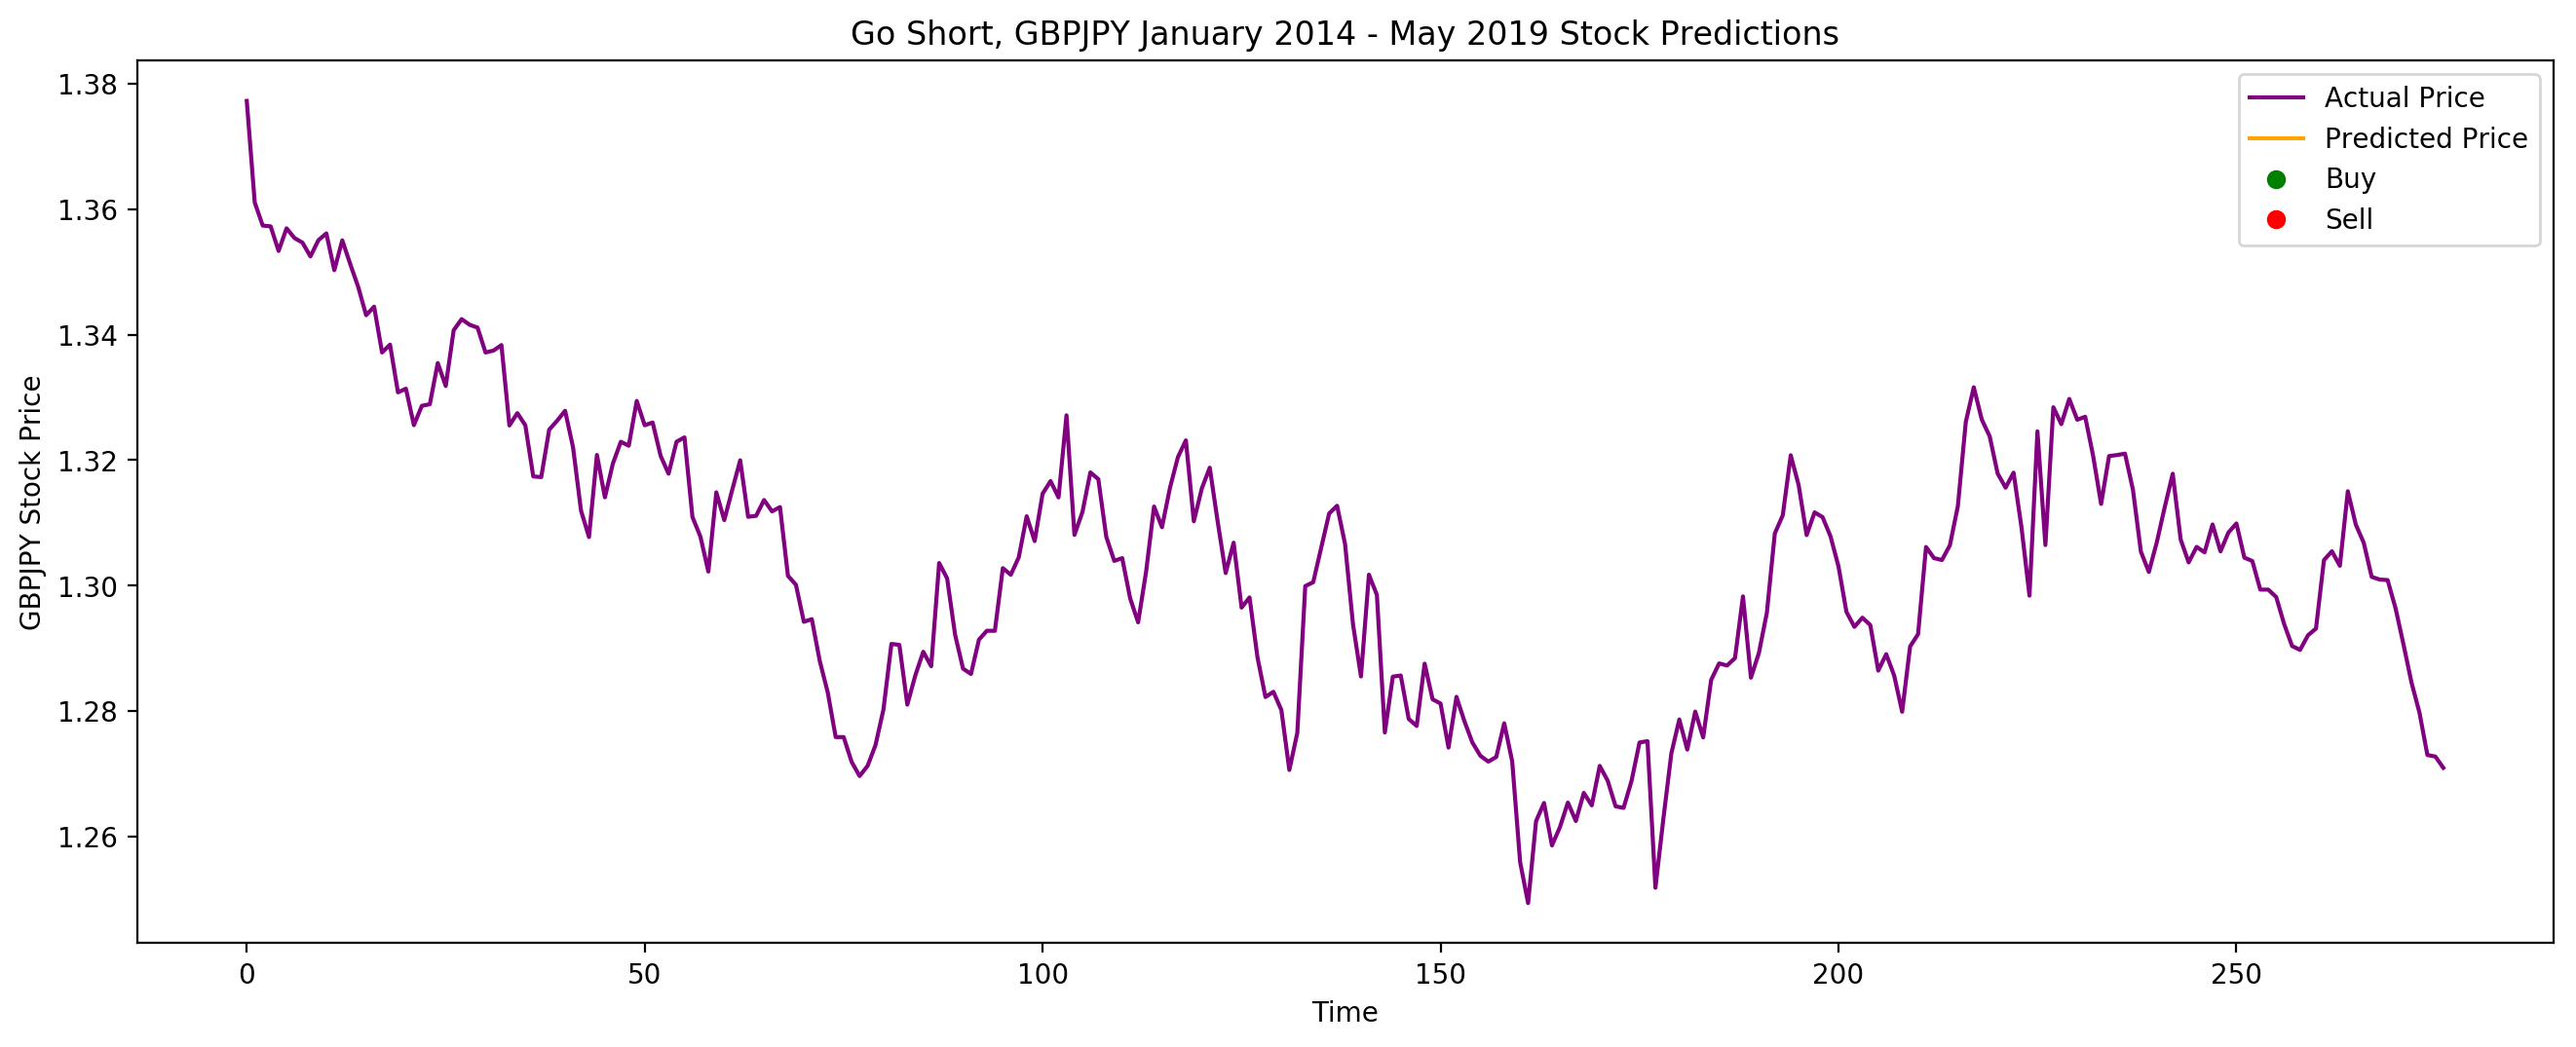

In [75]:
plt.figure(figsize=(16,6),dpi=200)
plt.plot(actual_stock_price, color =  'purple', label = "Actual Price")
plt.plot(price_prediction, color = 'orange', label = "Predicted Price")
plt.plot(BuyPoints_short[1], BuyPoints_short[0], "go",label='Buy')
plt.plot(SellPoints_short[1], SellPoints_short[0], "ro",label='Sell')

plt.title("Go Short, GBPJPY January 2014 - May 2019 Stock Predictions")
plt.xlabel('Time')
plt.ylabel('GBPJPY Stock Price')
plt.legend()
plt.show()

In [76]:
sc2 = MinMaxScaler(feature_range = (-1,1))

raw_prediction = sc2.fit_transform(raw_prediction)

Suggestion = []
percentChange = []

for d in range(1,len(raw_prediction)):
    percentChange.append(float((raw_prediction[d]-raw_prediction[d-1])))
    
for n in percentChange:
    #print(n)
    if n > 0.05:
        Suggestion.append(-1) # Sell after a threshhold of increase
    elif n < 0.01:
        Suggestion.append(1) # Buy when there is a drop
    else:
        Suggestion.append(0)
#print(Buy)

/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:364: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:365: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [77]:
PurchaseHistory_long=[]
BuyPoints_long =  [[], []]
SellPoints_long = [[], []]
bought_long = False
for i in range(0, len(actual_stock_price)-1):
    if Suggestion[i] == 1 and not bought_long:
        PurchaseHistory_long.append(["Buy: ", actual_stock_price[i], i])
        BuyPoints_long[0].append(actual_stock_price[i])
        BuyPoints_long[1].append(i)
        bought_long = True
    if Suggestion[i] == -1 and bought_long:
        PurchaseHistory_long.append(["Sell:", actual_stock_price[i], i])
        SellPoints_long[0].append(actual_stock_price[i])
        SellPoints_long[1].append(i)        
        bought_long = False
if len(PurchaseHistory_long)%2 != 0:
    PurchaseHistory_long.pop()
    BuyPoints_long[0].pop()
    BuyPoints_long[1].pop() 
#PurchaseHistory

In [78]:
purchase = 0
Profit_long = 0
for purchase in range(1, len(PurchaseHistory_long)+1, 2):
    MoneyMade_long = float(PurchaseHistory_long[purchase][1] - float(PurchaseHistory_long[purchase-1][1]))
    Profit_long += MoneyMade_long

print('$'+ str(round(Profit_long, 2)))

$0


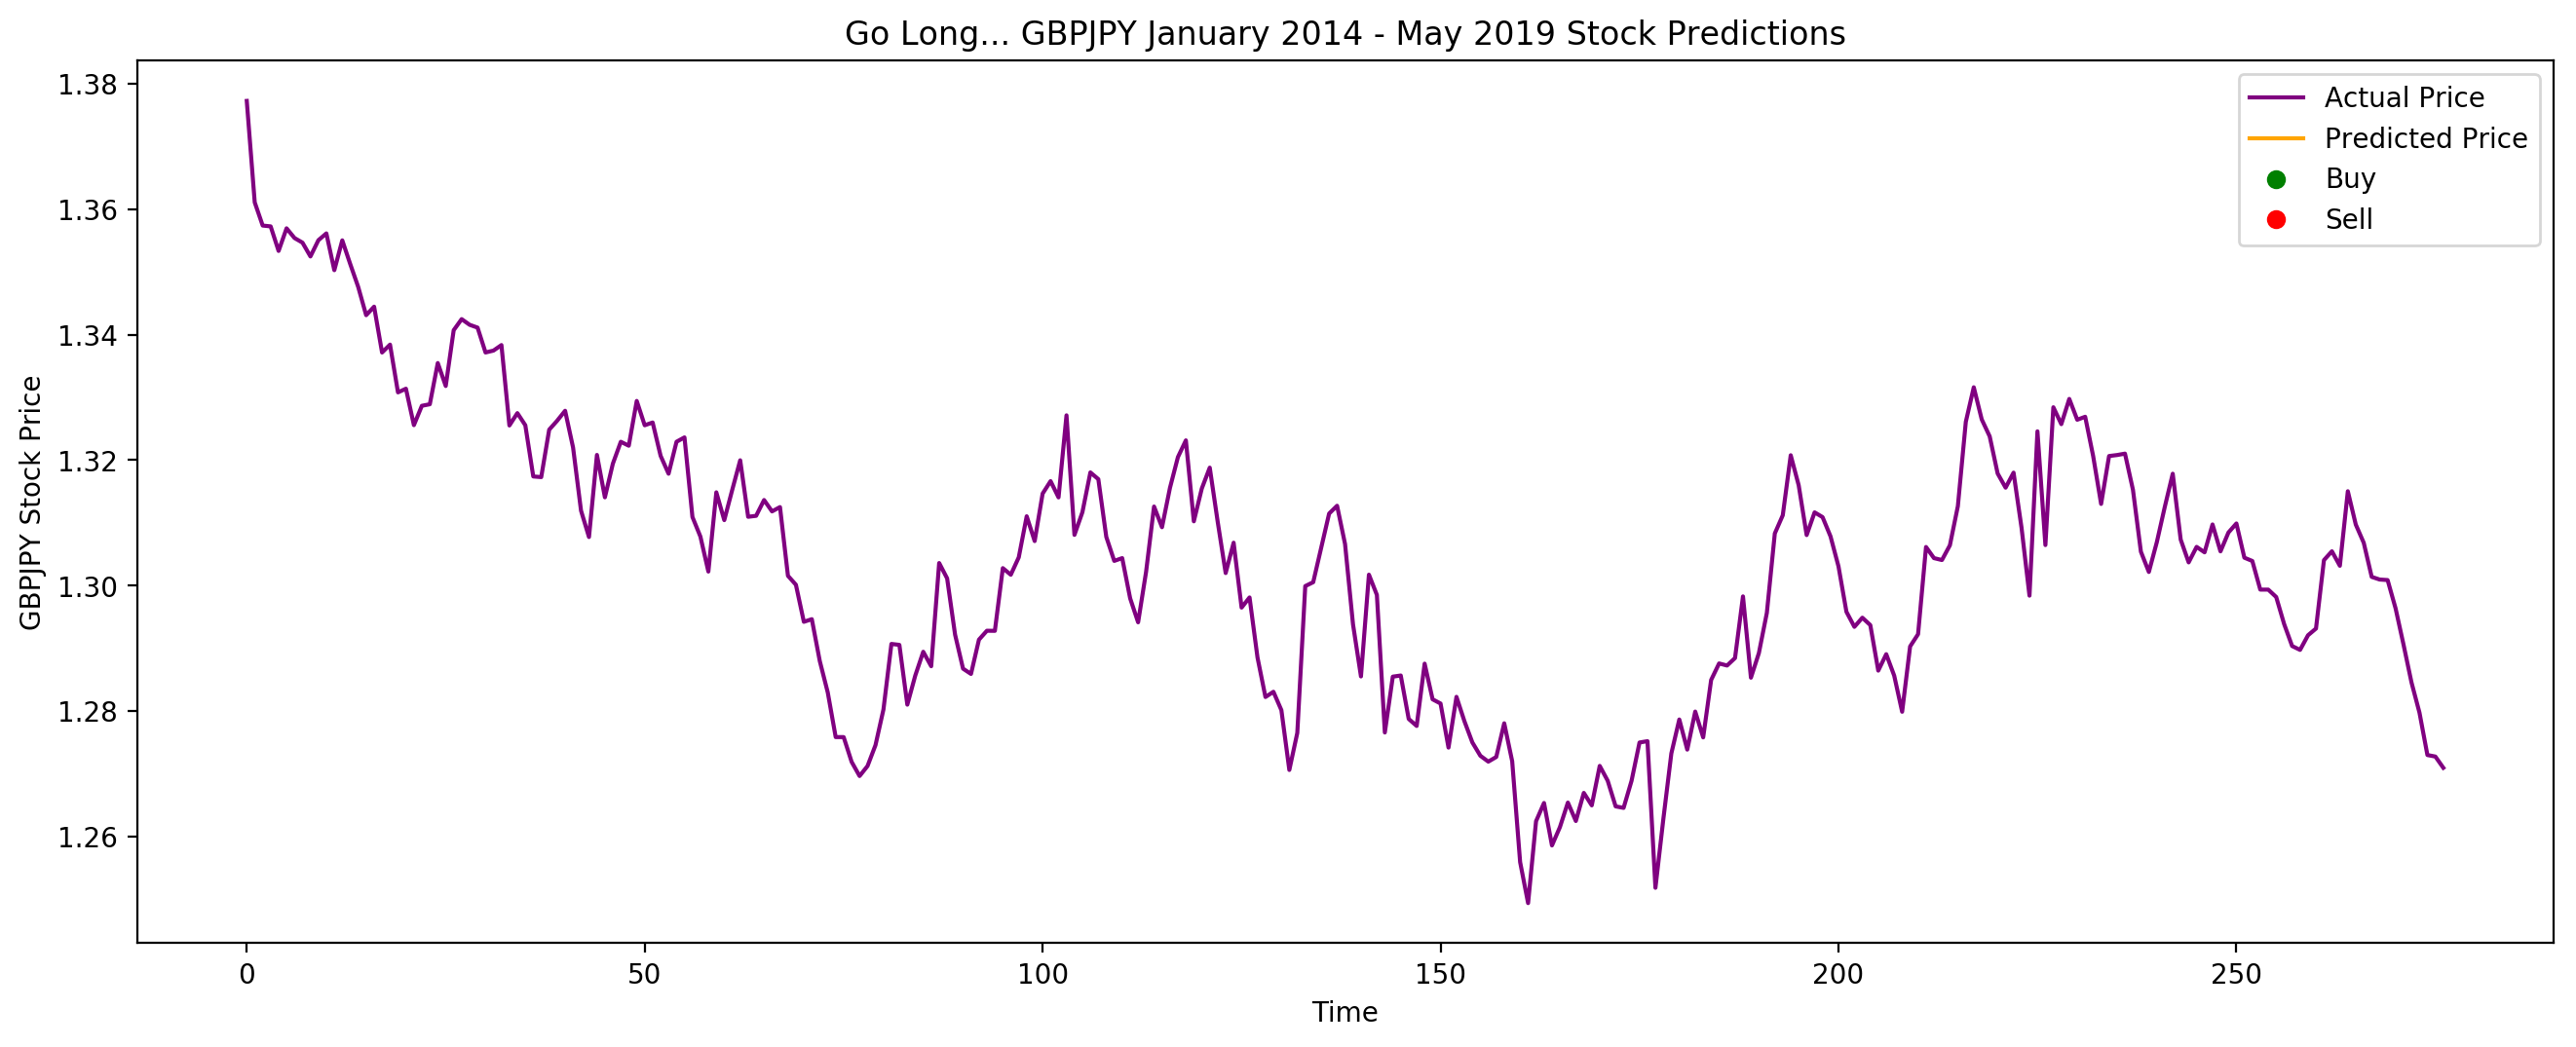

In [79]:
plt.figure(figsize=(16,6),dpi=200)
plt.plot(actual_stock_price, color =  'purple', label = "Actual Price")
plt.plot(price_prediction, color = 'orange', label = "Predicted Price")
plt.plot(BuyPoints_long[1], BuyPoints_long[0], "go",label='Buy')
plt.plot(SellPoints_long[1], SellPoints_long[0], "ro",label='Sell')
plt.title("Go Long... GBPJPY January 2014 - May 2019 Stock Predictions")
plt.xlabel('Time')
plt.ylabel('GBPJPY Stock Price')
plt.legend()
plt.show()

In [80]:
print('Long CumProfit :','$'+ str(round(Profit_long+Profit_short, 2)))

Long CumProfit : $0


In [81]:
MinimumRequiredCapital_long = max(BuyPoints_long[0])
MinimumRequiredCapital_short = max(BuyPoints_short[0])
ROI_long = Profit_long / MinimumRequiredCapital_long * 100
ROI_short = Profit_short / MinimumRequiredCapital_short * 100
print('Summary GBPJPY')
print('Minimum Required Capital long :',round(MinimumRequiredCapital_long[0]),'$')
print('Minimum Required Capital short :',round(MinimumRequiredCapital_short[0]),'$')
print('Short CumProfit :''$'+ str(round(Profit_short, 2)))
print('Long CumProfit :''$'+ str(round(Profit_long, 2)))
print('Cumulative Profit :','$'+ str(round(Profit_long+Profit_short, 2)))
print("Return on Long Investment:", round(float(ROI_long), 2),"%")
print("Return on Short Investment:", round(float(ROI_short), 2),"%")

ValueError: max() arg is an empty sequence

In [112]:
df.shape

(1338, 7)